## Step 2. Baseline Neural Network Model Performance

In [0]:
import numpy as np
import pandas

from keras import models
from keras import layers
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,Dropout,regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import optimizers, initializers

Using TensorFlow backend.


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
# load dataset
dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = dataframe.values # is used to convert into tensor
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [0]:
print("Dataset Shape :",dataframe.shape)
print("Data shape :",X.shape)
print("Dataset Labels shape :",Y.shape)

Dataset Shape : (208, 61)
Data shape : (208, 60)
Dataset Labels shape : (208,)


In [0]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [0]:
dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [0]:
# encode class values in o and 1
label_encoder = LabelEncoder()
label_encoder.fit(Y)
encoded_Y = label_encoder.transform(Y)

# lebel = LabelEncoder()
# encoded_Y = label.transform(Y)

In [0]:
from keras import initializers
from keras import optimizers
def create_baseline():
    model =Sequential()
    model.add(layers.Dense(60, kernel_initializer=initializers.random_normal(), activation='relu', input_shape=(60,)))
    model.add(layers.Dense(1, activation='sigmoid'))    
    model.compile(loss='binary_crossentropy', optimizer=optimizers.adam(), metrics=['accuracy'])
    return model

In [0]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)

print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 83.71% (6.13%)


## Step 3. Re-Run The Baseline Model With Data Preparation

In [0]:
# evaluate baseline model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 85.09% (4.55%)


## Step 4. Tuning Layers and Number of Neurons in The Model

### 4.1. Evaluate a Smaller Network

In [0]:
# smaller model
def create_smaller():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=60, kernel_initializer=initializers.random_normal(), activation='relu'))
    model.add(Dense(1, kernel_initializer=initializers.random_normal(), activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizers.adam(), metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 85.52% (5.01%)


### Step 4.2. Evaluate a Larger Network

In [0]:
# larger model
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer=initializers.random_normal(), activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizers.adam(), metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 85.04% (5.10%)


## Step 5: Really Scaling up: developing a model that overfits

#### This is fairly easy:
1.	Add layers.
2.	Make the layers bigger.
3.	Train for more epochs.

In [0]:
def overfit_model():
    model = Sequential()
    model.add(Dense(80, kernel_initializer=initializers.random_normal(), input_shape = (60,), activation='relu'))
    model.add(Dense(40, kernel_initializer=initializers.random_normal(), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dense(20, kernel_initializer=initializers.random_normal(), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dense(10, kernel_initializer=initializers.random_normal(), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dense(1, kernel_initializer=initializers.random_normal(), kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=overfit_model, epochs=200, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("ScaleUp Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ScaleUp Model: 80.64% (12.29%)


## Step 6: Tuning the Model

In [0]:
def Tune_model():
    model = Sequential()
    model.add(Dense(60, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu',input_dim=60))
    model.add(Dense(40, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu',))
    model.add(Dense(20, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu',))
    model.add(Dense(1, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=Tune_model, epochs=145, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=12, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Tune Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Tune Model: 87.88% (8.84%)


## Step 7: Rewriting the code using the Keras Functional API

In [0]:
def Function_API_Model():
    
    input_tensors = layers.Input(shape=(60,))
    a = layers.Dense(60, activation='relu')(input_tensors)
    b = layers.Dense(40, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001))(a)
    c = layers.Dense(20, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001))(b)
    output_tensor = layers.Dense(1, activation='sigmoid', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001))(c)

    model = models.Model(inputs=input_tensors, outputs=output_tensor)
    model.compile(optimizer="adam" , loss='binary_crossentropy', metrics=['accuracy'])
    return model
    
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=Function_API_Model, epochs=145, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=12, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Functional API Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Functional API Model: 85.59% (4.41%)


## Step 8: Rewriting the code by doing Model Subclassing


In [0]:
import keras
import tensorflow as tf

class MyModel(tf.keras.Model):
    
        def __init__(self):
                        super(MyModel, self).__init__()
                        self.dense1 = layers.Dense(60, activation='relu')
                        self.dense2 = layers.Dense(30, activation='relu')
                        self.dense3 = layers.Dense(1, activation='sigmoid')

        def call(self, inputs):
                        x = self.dense1(inputs)
                        x = self.dense2(x)
                        return self.dense3(x)
    
model = MyModel()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X, encoded_Y, epochs=145, batch_size=4, verbose=False)

## Step 9: Rewriting the code without using scikit-learn

In [0]:
from keras import models
from keras import layers

def Tune_model():
    model = Sequential()
    model.add(Dense(60, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu',input_dim=60))
    model.add(Dense(40, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu',))
    model.add(Dense(20, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu',))
    model.add(Dense(1, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
# Shuffle the dataset before split in values and labels
np.random.shuffle(dataset) 
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values in o and 1
label_encoder = LabelEncoder()
encoded_Y = label_encoder.fit_transform(Y)

# K-Fold
k = 6
num_val_samples = len(dataset) // k
val_acc_list = [] # used for validation data accuracy
val_loss_list = [] # used for Validation data loss

for fold in range(k):
    
    # Validation dataset
    val_data = X[fold * num_val_samples : (fold + 1) * num_val_samples]
    
    # Validation labels corresponding to the validation dataset
    val_label = encoded_Y[fold * num_val_samples : (fold + 1) * num_val_samples]
    
    
    # Training Dataset
    partial_train_data = np.concatenate([X[:fold * num_val_samples],
                                         X[(fold + 1) * num_val_samples:]],
                                        axis=0)
    
    # Training labels corresponding to the training dataset
    partial_train_label = np.concatenate([encoded_Y[:fold * num_val_samples],
                                          encoded_Y[(fold + 1) * num_val_samples:]],
                                         axis=0)
    
    model = Tune_model()
    result = model.fit(partial_train_data, partial_train_label, epochs=200, batch_size=29, verbose=0)
    val_loss, val_acc = model.evaluate(val_data, val_label, verbose=0)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

In [0]:
# result.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
val_acc_list, val_loss_list

([0.76470588235294112,
  0.88235294117647056,
  0.76470588235294112,
  0.73529411764705888,
  0.79411764705882348,
  0.8529411764705882],
 [0.55970741238664179,
  0.34776177958530541,
  0.99479721398914567,
  1.036072899313534,
  1.0213278041166418,
  0.38427321481354099])

In [0]:
np.mean(val_acc_list)

0.79901960784313719

In [0]:
# Shuffle the dataset before split in values and labels
np.random.shuffle(dataset) 
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values in o and 1
label_encoder = LabelEncoder()
encoded_Y = label_encoder.fit_transform(Y)

# K-Fold
k = 6
num_val_samples = len(dataset) // k
val_acc_list = [] # used for validation data accuracy
val_loss_list = [] # used for Validation data loss

for fold in range(k):
    
    # Validation dataset
    val_data = X[fold * num_val_samples : (fold + 1) * num_val_samples]
    
    # Validation labels corresponding to the validation dataset
    val_label = encoded_Y[fold * num_val_samples : (fold + 1) * num_val_samples]
    
    
    # Training Dataset
    partial_train_data = np.concatenate([X[:fold * num_val_samples],
                                         X[(fold + 1) * num_val_samples:]],
                                        axis=0)
    
    # Training labels corresponding to the training dataset
    partial_train_label = np.concatenate([encoded_Y[:fold * num_val_samples],
                                          encoded_Y[(fold + 1) * num_val_samples:]],
                                         axis=0)
    
    model = Tune_model()
    result = model.fit(partial_train_data, partial_train_label, epochs=200, batch_size=29, verbose=0, 
                       validation_data=(val_data, val_label))

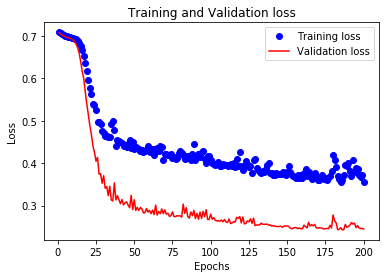

In [0]:
acc = result.history['acc']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

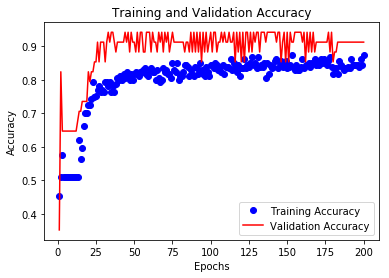

In [0]:
plt.clf()

loss = result.history['acc']
val_loss = result.history['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()